In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [74]:
# Create the .kaggle directory in your user folder
import os
os.makedirs(r'C:\Users\rishi\.kaggle', exist_ok=True)

In [75]:
# specifying dataset paths
data_train_path = r'C:\Users\rishi\Desktop\brain tumour classification\Training'

data_test_path = r"C:\Users\rishi\Desktop\brain tumour classification\Testing"

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
# since everyimage is of different size to convert into fixed size
image_width = 180
image_length = 180

In [78]:
data_train = keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(180, 180),
    batch_size=32,
    validation_split = False  
)


Found 2870 files belonging to 4 classes.


In [79]:
data_train.class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [80]:
data_cat = data_train.class_names

In [81]:
data_test =  keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (image_width,image_length),
    batch_size = 32,
    validation_split = False
)

Found 394 files belonging to 4 classes.


In [82]:
data_test.class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

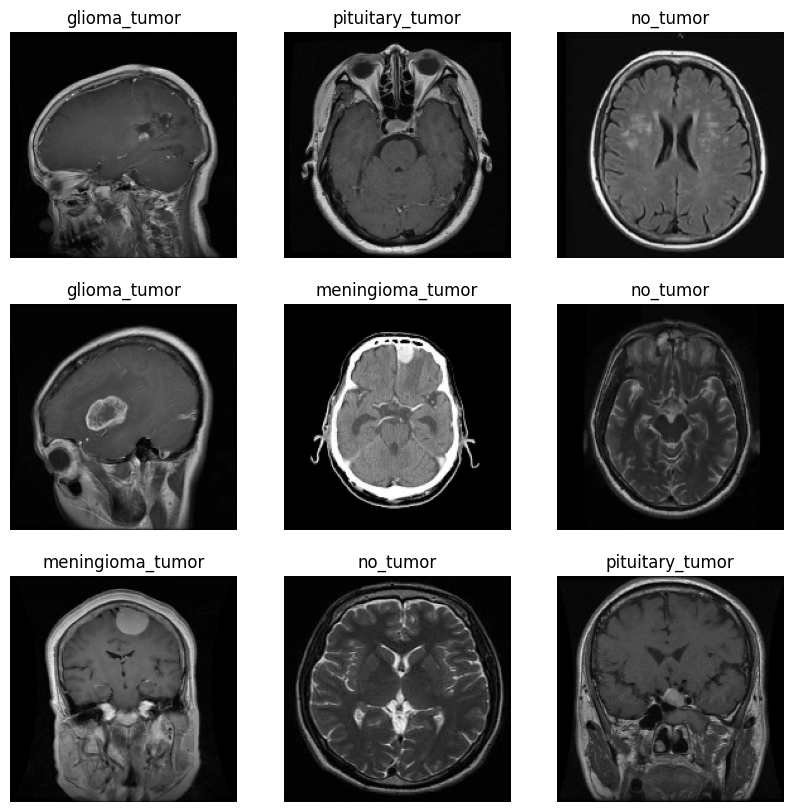

In [83]:
# to display images
plt.figure(figsize=(10,10)) # This line creates a new figure for plotting with a specified size of 10 inches by 10 inches

for image, labels in data_train.take(1): # This function takes the first batch of images and labels from the data_train dataset.

    for i in range(9): # This loop runs 9 times, allowing you to display 9 images (in a 3x3 grid).

        plt.subplot(3,3,i+1) # create subplot 3,3: Specifies a 3x3 grid of subplots, i - position

        plt.imshow(image[i].numpy().astype('uint8')) # .numpy(): Converts the TensorFlow tensor to a NumPy 

        plt.title(data_cat[labels[i]]) # used for title labels[i]: Retrieves the label for the i-th image in the batch,  maps label indices to category names. 
        
        plt.axis('off')

In [94]:
model = keras.Sequential([
    keras.layers.Rescaling(1/255),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation = "relu",input_shape = (180,180,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(4,activation="softmax")
])

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [96]:
epochs_size = 5
history = model.fit(data_train,validation_data = data_test,epochs = epochs_size)

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.4722 - loss: 1.7727 - val_accuracy: 0.4949 - val_loss: 1.3362
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.8027 - loss: 0.5626 - val_accuracy: 0.6497 - val_loss: 1.1561
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.9330 - loss: 0.2331 - val_accuracy: 0.7310 - val_loss: 1.4623
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.9714 - loss: 0.1078 - val_accuracy: 0.7183 - val_loss: 1.6012
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.9937 - loss: 0.0501 - val_accuracy: 0.7411 - val_loss: 1.8828


Text(0.5, 1.0, 'Loss')

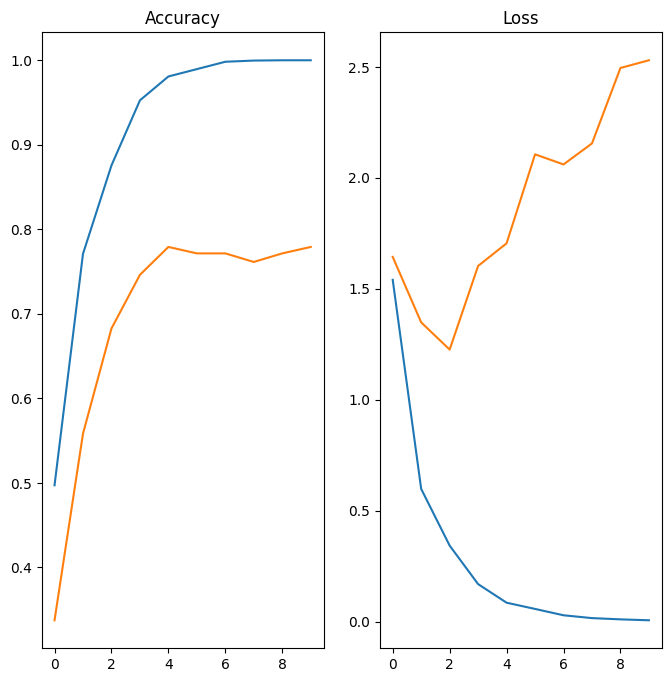

In [87]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Traning Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Traning loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation loss')
plt.title('Loss')

In [88]:
model.evaluate(data_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7893 - loss: 2.2718


[2.530067205429077, 0.779187798500061]

In [102]:
image =r'C:\Users\rishi\Desktop\brain tumour classification\Testing\meningioma_tumor\image(3).jpg'
image = tf.keras.utils.load_img(image, target_size=(image_length,image_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [103]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [104]:
score = tf.nn.softmax(predict)

In [105]:
print('Tumour in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Tumour in image is meningioma_tumor with accuracy of 34.32
